<a href="https://colab.research.google.com/github/tuntunwinkic/Face_with-Pi/blob/master/lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ဒီမှာ နည်းနည်း ပြောင်းကြည့်မယ်

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [0]:
from fastai.vision import *


 ဗီးရှင်း လိုင်ဘရီကို ထည့်ထားတာပါ

ပြီးတော့ ကိုလတ်ပေါ်မှာ fastai ကိုယူတင်ပြီး configure လုပ်ပါတယ်

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


ဒါကတော့ ဂုဂဲ ဒရိုက် သုံးလို့ရအောင် လုပ်တာပါ ကိုယ့်ရဲ့ ဂုဂဲ ဒရိုက်ထဲမှာ Workshop ဆိုတဲ့ ဖိုလ်ဒါတစ်ခုကို manually သွားဆောက်ပေးထားဖို့ လိုပါတယ် ဒီလိုင်းကို run တဲ့အခါ လင့် တစ်ခု ပေါ်လာပါမယ် အဲ့လင့်ကို ကလစ်ပါ နောက်ထပ် ပေ့ချ် တစ်ခု ပွင့်လာပါလိမ့်မယ် အဲ့ဒီကနေ ...... တဆင့်ချင်းသွားပါမယ်

In [41]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Workshop/'



Mounted at /content/gdrive


ဖိုလ်ဒါ နာမယ် ဖိုင်နာမယ် ပေးခဲ့ပါမယ်

In [0]:
folder = 'black'
file = 'urls_black.csv'

In [0]:

folder = 'teddy'
file = 'urls_teddy.csv'

In [0]:
folder = 'gizzy'
file = 'urls_grizzly.csv'

 ဒေတာထဲက bears folder ထဲကို csv files တွေ ထည့်ရမှာ

In [0]:
path = Path(base_dir + 'data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [45]:
print(path)
print(path/file)
print(dest)

/content/gdrive/My Drive/Workshop/data/bears
/content/gdrive/My Drive/Workshop/data/bears/urls_grizzly.csv
/content/gdrive/My Drive/Workshop/data/bears/gizzy


In [19]:
path.ls()

[PosixPath('/content/gdrive/My Drive/Workshop/data/bears/black'),
 PosixPath('/content/gdrive/My Drive/Workshop/data/bears/gizzy'),
 PosixPath('/content/gdrive/My Drive/Workshop/data/bears/teddy'),
 PosixPath('/content/gdrive/My Drive/Workshop/data/bears/urls_teddy.csv'),
 PosixPath('/content/gdrive/My Drive/Workshop/data/bears/urls_grizzly.csv'),
 PosixPath('/content/gdrive/My Drive/Workshop/data/bears/urls_black.csv'),
 PosixPath('/content/gdrive/My Drive/Workshop/data/bears/teddys')]

In [23]:
download_images(path/file, dest, max_pics=200)


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
classes = ['teddys','grizzly','black']


In [25]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys
grizzly
black


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [27]:
data.classes


['black', 'gizzy', 'teddy']

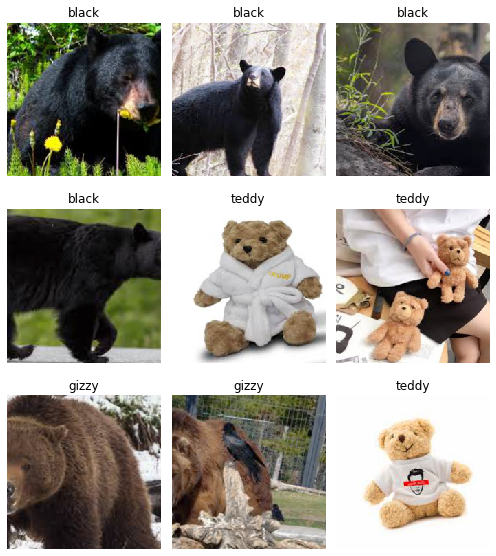

In [28]:
data.show_batch(rows=3, figsize=(7,8))


In [29]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['black', 'gizzy', 'teddy'], 3, 192, 48)

In [30]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 42.2MB/s]


In [31]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.611070,0.171709,0.062500,00:04
1,0.921411,0.043679,0.000000,00:03
2,0.636915,0.070020,0.041667,00:03
3,0.486404,0.079327,0.041667,00:03


In [0]:
learn.save('stage-1')


In [0]:
learn.unfreeze()


In [34]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


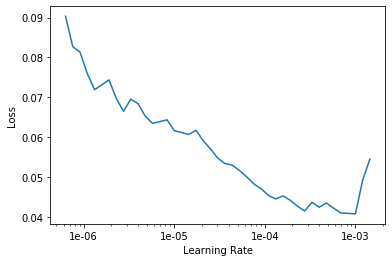

In [35]:
learn.recorder.plot()


In [36]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.032163,0.191538,0.041667,00:03
1,0.040515,0.226693,0.041667,00:03


In [0]:
learn.save('stage-2')


In [0]:
learn.load('stage-2');


In [39]:
interp = ClassificationInterpretation.from_learner(learn)


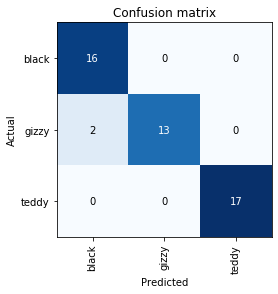

In [40]:
interp.plot_confusion_matrix()
